Installation de la bibliothèque tinydb




In [ ]:
!pip install tinydb

Chargement des données

In [ ]:
from tinydb import TinyDB, Query
import pandas as pd
import json

# Charger les données Kaggle
data = pd.read_csv('/content/online_retail (1).csv')  # Chargez le fichier déjà uploadé
data.dropna(inplace=True)  # Supprimer les valeurs manquantes


Conversion Nosql

In [ ]:
# Convertir les données en liste de dictionnaires (format JSON)
json_data = data.to_dict(orient='records')


Création de la base de donnée Nosql

In [ ]:
from tinydb import TinyDB

# Créer une base de données NoSQL
db = TinyDB('retail_nosql.json')

# Insérer les données dans la base de données
db.insert_multiple(json_data)

# Vérifier le nombre total de documents
print(f"Nombre total de documents dans la base de données : {len(db)}")


Nombre total de documents dans la base de données : 406829


Analyse des données : filtrage

In [ ]:
from tinydb import Query

# Requête pour filtrer les articles avec un prix unitaire > 10
query = Query()
high_price_items = db.search(query.UnitPrice > 10)

# Afficher le nombre de produits correspondants
print(f"Nombre de produits avec un prix unitaire > 10 : {len(high_price_items)}")


Nombre de produits avec un prix unitaire > 10 : 11744


Comptage des données

In [ ]:
from collections import Counter

# Extraire tous les pays dans la base de données
countries = [item['Country'] for item in db]

# Compter les occurrences de chaque pays
country_counts = Counter(countries)

# Obtenir les 10 pays avec le plus grand nombre de ventes
top_10_countries = country_counts.most_common(10)
print("Top 10 des pays par nombre de ventes :", top_10_countries)


Top 10 des pays par nombre de ventes : [('United Kingdom', 361878), ('Germany', 9495), ('France', 8491), ('EIRE', 7485), ('Spain', 2533), ('Netherlands', 2371), ('Belgium', 2069), ('Switzerland', 1877), ('Portugal', 1480), ('Australia', 1259)]


Visualisation des données

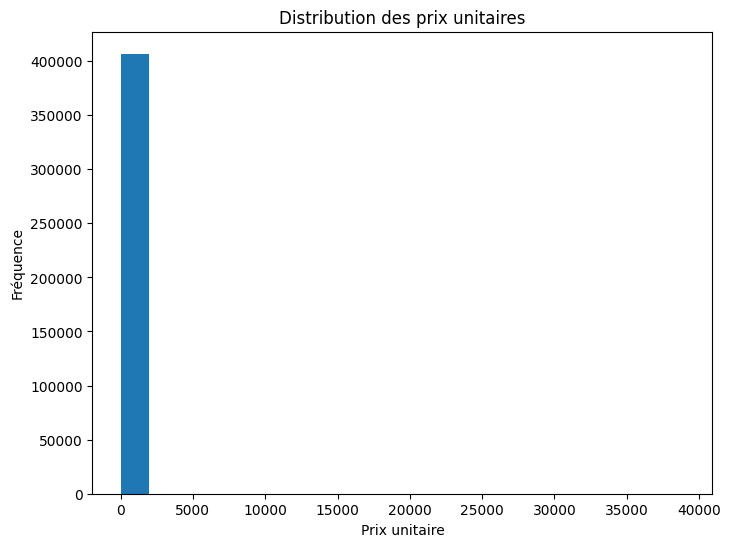

In [ ]:
import matplotlib.pyplot as plt

# Extraire tous les prix unitaires
unit_prices = [item['UnitPrice'] for item in db if 'UnitPrice' in item]

# Créer un histogramme des prix unitaires
plt.figure(figsize=(8, 6))
plt.hist(unit_prices, bins=20)
plt.xlabel("Prix unitaire")
plt.ylabel("Fréquence")
plt.title("Distribution des prix unitaires")
plt.show()


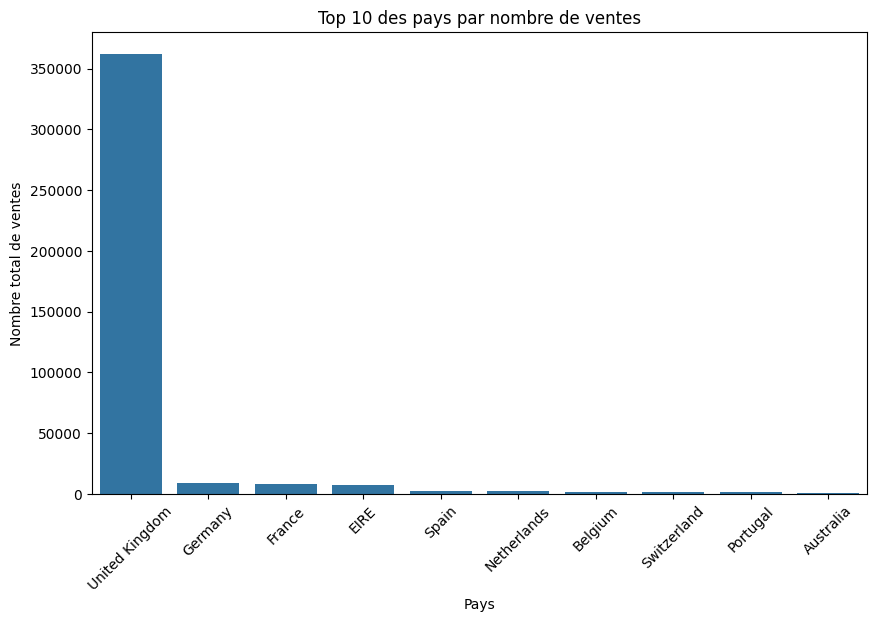

In [ ]:
import seaborn as sns

# Extraire les pays et leurs ventes totales
countries, sales = zip(*top_10_countries)

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=list(countries), y=list(sales))
plt.xlabel("Pays")
plt.ylabel("Nombre total de ventes")
plt.title("Top 10 des pays par nombre de ventes")
plt.xticks(rotation=45)
plt.show()


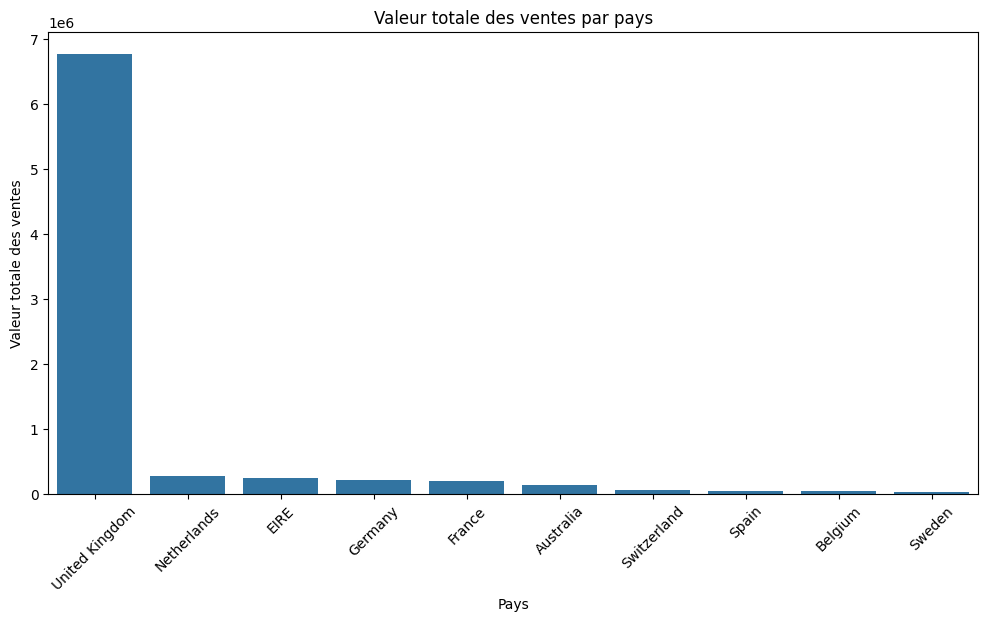

In [ ]:
# Calculer la valeur totale des ventes par pays
sales_values = [item['Quantity'] * item['UnitPrice'] for item in db if 'Quantity' in item and 'UnitPrice' in item]
countries_sales = {}

for item in db:
    if 'Quantity' in item and 'UnitPrice' in item and 'Country' in item:
        country = item['Country']
        sales = item['Quantity'] * item['UnitPrice']
        countries_sales[country] = countries_sales.get(country, 0) + sales

# Trier les ventes par pays (Top 10)
sorted_sales = sorted(countries_sales.items(), key=lambda x: x[1], reverse=True)[:10]
countries, sales = zip(*sorted_sales)

# Créer un graphique en barres
plt.figure(figsize=(12, 6))
sns.barplot(x=list(countries), y=list(sales))
plt.xlabel("Pays")
plt.ylabel("Valeur totale des ventes")
plt.title("Valeur totale des ventes par pays")
plt.xticks(rotation=45)
plt.show()


Fermeture de la base de données

In [ ]:
# Fermer la base de données
db.close()
